In [1]:
# Import dataset - 10% of entire dataset, or can also use subset='http'
from sklearn.datasets import fetch_kddcup99
kdd99_data = fetch_kddcup99(subset = 'http')
import numpy as np
X_og = kdd99_data['data']
y_og = kdd99_data['target']

In [ ]:
# When running 10% of entire dataset - Remove categorical data
X_num_sample = np.delete(X_og,[1,2,3],1)
print(X_num_sample.shape)
print(y_og.shape)

In [ ]:
# Make sure all categorical columns were removed
X_num_sample[0:1]

In [ ]:
# When running 10% of entire dataset - Take a sample from the dataset 
sample_indices = np.random.choice(range(len(y_og)), 59000)
X_sample = X_num_sample[sample_indices,:]
y = y_og[sample_indices]
print(X_sample.shape)
print(y.shape)

In [2]:
# http subset - Take a sample from the dataset
sample_indices = np.random.choice(range(len(y_og)), 59000)
X_sample = X_og[sample_indices,:]
y = y_og[sample_indices]
print(X_sample.shape)
print(y.shape)

(59000, 3)
(59000,)


In [ ]:
# from sklearn import preprocessing
# labelnums = preprocessing.LabelEncoder()
# labelnums.fit(y_og)
# list(labelnums.classes_)

In [ ]:
# attack_types = labelnums.transform(y)
# attack_types = np.int64(attack_types)
# attack_types

In [3]:

for i in range(X_sample.shape[0]):
  
    if(y[i]==b'normal.'):
        y[i] = 0

    if(y[i]==b'neptune.'):
        y[i] = 1
        
    if(y[i]==b'smurf.'):
         y[i] = 2
        
    if(y[i]==b'pod.'):
         y[i] = 3
    
    if(y[i]==b'teardrop.'):
         y[i] = 4
        
    if(y[i]==b'land.'):
         y[i] = 5
        
    if(y[i]==b'back.'):
         y[i] = 6

    if(y[i]==b'buffer_overflow.'): 
         y[i] = 7
    
    if(y[i]==b'loadmodule.'):
         y[i] = 8
       
    if(y[i]==b'perl.'): 
         y[i] = 9
    
    if(y[i]==b'rootkit.'): 
         y[i] = 1
    
    if(y[i]==b'guess_passwd.'):
         y[i] = 10
    
    if(y[i]==b'ftp_write.'):
         y[i] = 11
    
    if(y[i]==b'imap.'):
         y[i] = 12
    
    if(y[i]==b'phf.'):
         y[i] = 13
    
    if(y[i]==b'multihop.'): 
         y[i] = 14
    
    if(y[i]==b'warezmaster.'):
         y[i] = 15
    
    if(y[i]==b'warezclient.'):
         y[i] = 16
    
    if(y[i]==b'spy.'):
         y[i] = 17
       
    if(y[i]==b'portsweep.'):
         y[i] = 18
    
    if(y[i]==b'ipsweep.'):
         y[i] = 19
        
    if(y[i]==b'nmap.'): 
         y[i] = 20
        
    if(y[i]==b'satan.'):
         y[i] = 21
       

In [4]:
y = np.int64(y)
y
print(set(y))

{0, 21, 13, 6}


In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_sample, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 20, random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [7]:
y_pred

array([0, 0, 0, ..., 6, 6, 0], dtype=int64)

In [8]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

recall_scores = []
precision_scores = []
f1_scores = []

def calculations(n):
 
    clf = RandomForestClassifier(max_depth = n, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
  
    y_pred = np.array(y_pred)
    r = recall_score(y_test, y_pred, average = None)
    p = precision_score(y_test, y_pred, average=None)
    f = f1_score(y_test, y_pred, average=None)
    
   
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)

In [9]:
ilist = []
i = 1
while i<20:
    calculations(i)
    ilist.append(i)
    i=i+1

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [10]:
print('Recall Scores:', recall_scores)
print('\n\nPrecision Scores:', precision_scores)
print('\n\nF1 Scores:', f1_scores)
print('\n\nMax Depth Values:', ilist)

Recall Scores: [array([1., 0., 0., 0.]), array([1., 1., 0., 0.]), array([1., 1., 0., 0.]), array([1., 1., 0., 0.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.])]


Precision Scores: [array([0.96235234, 0.        , 0.        , 0.        ]), array([0.99989327, 1.        , 0.        , 0.        ]), array([0.99989327, 1.        , 0.        , 0.        ]), array([0.99989327, 1.        , 0.        , 0.        ]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1., 1., 1., 1.]), array([1.,

In [11]:
import matplotlib.pyplot as plt

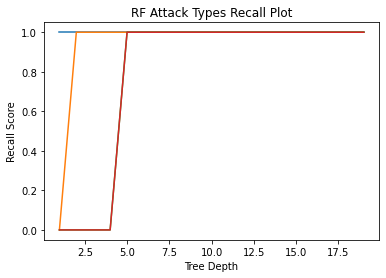

In [12]:
plt.plot(ilist, recall_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Recall Score')
plt.title('RF Attack Types Recall Plot')
plt.show()

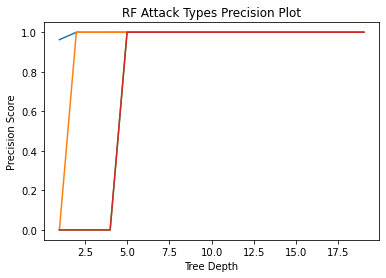

In [13]:
plt.plot(ilist, precision_scores)
plt.xlabel('Tree Depth')
plt.ylabel('Precision Score')
plt.title('RF Attack Types Precision Plot')
plt.show()

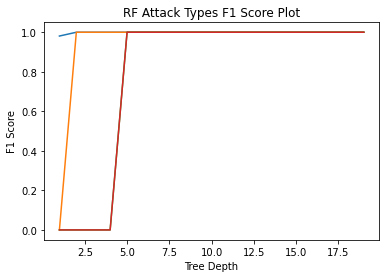

In [14]:
plt.plot(ilist, f1_scores)
plt.xlabel('Tree Depth')
plt.ylabel('F1 Score')
plt.title('RF Attack Types F1 Score Plot')
plt.show()